In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
from gradient_loader import load_stacked_gradients, load_gradients_by_batch

# Configuration
GRADIENTS_DIR = "cifar_results/gradients"
EPOCH_TO_LOAD = 0

print(f"Loading gradients from: {GRADIENTS_DIR}")
print(f"Epoch: {EPOCH_TO_LOAD}")

torch.set_grad_enabled(False)

Loading gradients from: cifar_results/gradients
Epoch: 0


In [2]:
stacked_gradients = load_stacked_gradients(GRADIENTS_DIR, EPOCH_TO_LOAD)
print(f"\n✅ Successfully loaded gradients for {len(stacked_gradients)} parameters")

# Show what we loaded
for param_name, gradients in stacked_gradients.items():
    print(f"  {param_name}: {gradients.shape}")

Loaded metadata: {'epoch': 0, 'batch_idx': 390, 'total_samples': 80, 'parameter_names': ['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.1.weight', 'conv_layers.1.bias', 'conv_layers.2.weight', 'conv_layers.2.bias', 'fc_layers.0.weight', 'fc_layers.0.bias']}
Found 3128 gradient files
Concatenating gradients from all batches...
Successfully loaded 8 parameters
  conv_layers.0.weight: torch.Size([50000, 16, 3, 3, 3]) (82.40 MB)
  conv_layers.0.bias: torch.Size([50000, 16]) (3.05 MB)
  conv_layers.1.weight: torch.Size([50000, 32, 16, 3, 3]) (878.91 MB)
  conv_layers.1.bias: torch.Size([50000, 32]) (6.10 MB)
  conv_layers.2.weight: torch.Size([50000, 32, 32, 3, 3]) (1757.81 MB)
  conv_layers.2.bias: torch.Size([50000, 32]) (6.10 MB)
  fc_layers.0.weight: torch.Size([50000, 64, 512]) (6250.00 MB)
  fc_layers.0.bias: torch.Size([50000, 64]) (12.21 MB)
Total memory: 8996.58 MB

✅ Successfully loaded gradients for 8 parameters
  conv_layers.0.weight: torch.Size([50000, 16, 3, 3, 3])

🔍 GPU-Accelerated K-means Clustering Analysis
Analyzing parameter: fc_layers.0.weight
Gradient tensor shape: torch.Size([50000, 64, 512])
No digit filtering - using default n_clusters = 10

2. Performing GPU-accelerated k-means clustering with 10 clusters...
Performing GPU-accelerated k-means clustering on gradients tensor of shape torch.Size([50000, 64, 512])
Number of clusters: 10
Initialization method: random
Device: cuda:0
Using batches from 20.0% to 100.0% for clustering
Minimum gradient norm percentile: 0.5%
Clustering on 40000 batches (indices 10000 to 49999) out of 50000 total batches
Gradient norm percentile threshold: 4.4462
Filtered to 39800 gradients (out of 40000) with norm >= 4.4462
Final clustering shape: torch.Size([39800, 32768])
Memory usage: 4975.00 MB
Running k-means with 1 different initializations...


K-means initializations: 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]


Clustering completed in 4.90 seconds
Assigning all original batches to clusters...

Clustering Results Summary:
  Inertia: 15756933.00
  Cluster sizes: {0: 2820, 1: 11047, 2: 4758, 3: 1658, 4: 4812, 5: 9905, 6: 3307, 7: 4652, 8: 2135, 9: 4906}
  Clustering performed on 39800/40000 batches in subset (99.5%)
  Subset: 40000/50000 total batches (80.0%)

3. Plotting clustering results...


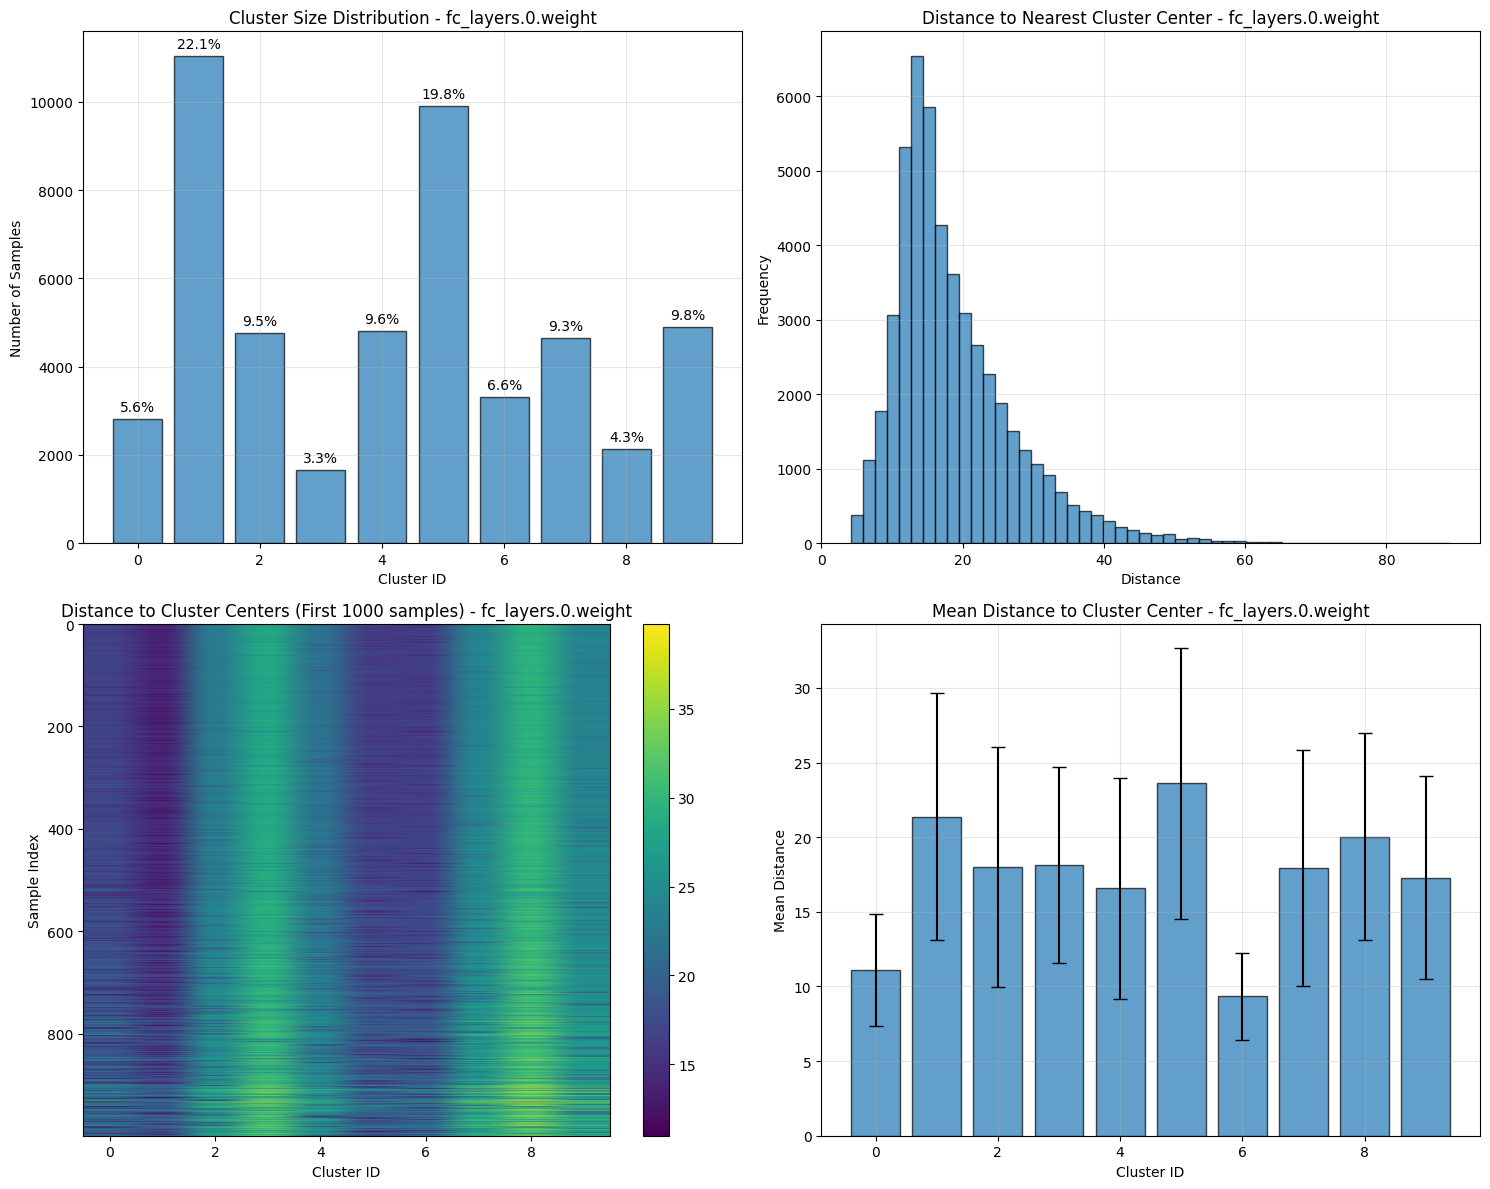

In [14]:
param_name = "fc_layers.0.weight"

# Import the k-means clustering utilities and config
from k_means import kmeans_gradients, plot_clustering_results, analyze_cluster_characteristics, find_optimal_clusters
from config import Config

# Check if we have loaded gradients
if 'stacked_gradients' in locals() and stacked_gradients:
    print("🔍 GPU-Accelerated K-means Clustering Analysis")
    print("=" * 50)
    
    # Load config to check for digit filtering
    config = Config()
    
    # Pick a parameter to analyze (you can change this)
    gradients_tensor = stacked_gradients[param_name]

    print(f"Analyzing parameter: {param_name}")
    print(f"Gradient tensor shape: {gradients_tensor.shape}")
    
 

    n_clusters = 10  # Default for all digits
    print("No digit filtering - using default n_clusters = 10")
    
    # Perform k-means clustering (with progress bar)
    print(f"\n2. Performing GPU-accelerated k-means clustering with {n_clusters} clusters...")
    clustering_results = kmeans_gradients(
        gradients_tensor.cuda(), 
        n_clusters=n_clusters,
        use_gpu=True,
        max_iter=1000,
        n_init=1,
        init_method="random",
        start_fraction=0.2,
        end_fraction=1,
        min_grad_percentile=0.5
        )
    
    # Plot comprehensive results
    print(f"\n3. Plotting clustering results...")
    plot_clustering_results(clustering_results, param_name)

param_name fc_layers.0.weight


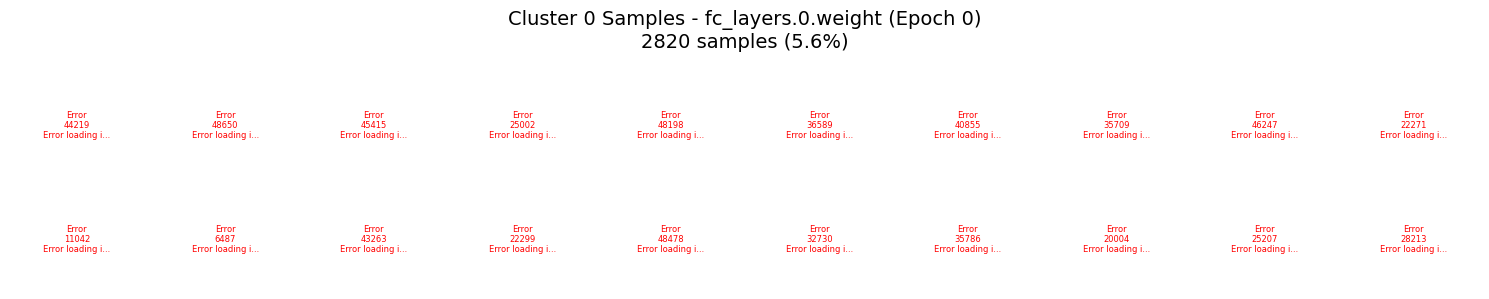


Cluster 0 Statistics for fc_layers.0.weight (Epoch 0):
  Size: 2820 samples (5.6%)
  Sample indices: [44219, 48650, 45415, 25002, 48198, 36589, 40855, 35709, 46247, 22271, 11042, 6487, 43263, 22299, 48478, 32730, 35786, 20004, 25207, 28213]


In [15]:
# Import the visualization utilities
from cluster_visualization import visualize_cluster_samples, visualize_cluster_centers, analyze_cluster_diversity, visualize_specific_cluster

print("param_name", param_name)

# Example usage - replace with your actual clustering results
epoch = 0  # Images are saved for epoch 0

c=0
visualize_specific_cluster(clustering_results, param_name, epoch, num_samples=20, cluster_id=c, data_dir="cifar_results/gradients")

🎨 Creating t-SNE Visualization
Digit filtering detected: True
t-SNE will show original digits for better visualization
Creating t-SNE visualization for: fc_layers.0.weight
Using clustering results with 10 clusters
t-SNE filtering settings:
  Training position: 20.0% to 100.0%
  Gradient percentile: >= 0.5%
  (These match the k-means clustering settings)
Creating t-SNE visualization for fc_layers.0.weight (epoch 0)
Filtering: start_fraction=20.0%, end_fraction=100.0%, min_grad_percentile=0.5%
Loaded metadata: {'epoch': 0, 'batch_idx': 390, 'total_samples': 80, 'parameter_names': ['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.1.weight', 'conv_layers.1.bias', 'conv_layers.2.weight', 'conv_layers.2.bias', 'fc_layers.0.weight', 'fc_layers.0.bias']}
Found 3128 gradient files
Concatenating gradients from all batches...
Successfully loaded 8 parameters
  conv_layers.0.weight: torch.Size([50000, 16, 3, 3, 3]) (82.40 MB)
  conv_layers.0.bias: torch.Size([50000, 16]) (3.05 MB)
  conv

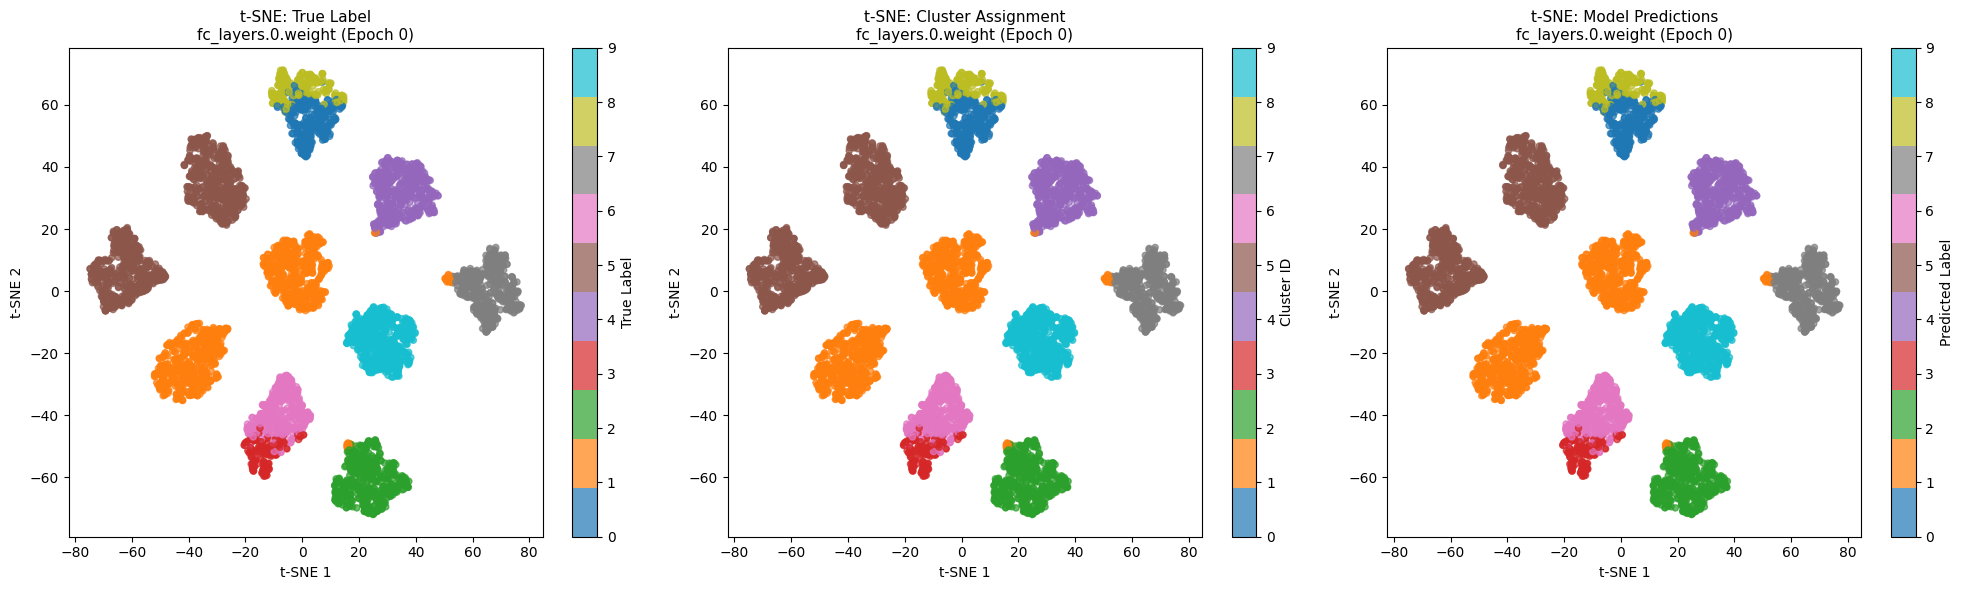


t-SNE Visualization Statistics:
  Parameter: fc_layers.0.weight
  Epoch: 0
  Samples used: 5000
  Number of clusters: 10
  t-SNE perplexity: 30

Label-Cluster Correspondence:
  Cluster 0: Dominant true label 0 (100.0%)
  Cluster 1: Dominant true label 1 (100.0%)
  Cluster 2: Dominant true label 2 (100.0%)
  Cluster 3: Dominant true label 3 (100.0%)
  Cluster 4: Dominant true label 4 (100.0%)
  Cluster 5: Dominant true label 5 (100.0%)
  Cluster 6: Dominant true label 6 (100.0%)
  Cluster 7: Dominant true label 7 (100.0%)
  Cluster 8: Dominant true label 8 (100.0%)
  Cluster 9: Dominant true label 9 (100.0%)

Prediction-Cluster Correspondence:
  Cluster 0: Dominant prediction 0 (100.0%)
  Cluster 1: Dominant prediction 1 (100.0%)
  Cluster 2: Dominant prediction 2 (100.0%)
  Cluster 3: Dominant prediction 3 (100.0%)
  Cluster 4: Dominant prediction 4 (100.0%)
  Cluster 5: Dominant prediction 5 (100.0%)
  Cluster 6: Dominant prediction 6 (100.0%)
  Cluster 7: Dominant prediction 7 (100.

In [17]:
# Import t-SNE visualization function and config
from cluster_visualization import visualize_tsne_gradients
from cifar_config import CIFARConfig

# Create t-SNE visualization using the clustering results from above
print("🎨 Creating t-SNE Visualization")
print("=" * 40)

# Load config to check for digit filtering
config = CIFARConfig()
if config.filter_digits is not None:
    print(f"Digit filtering detected: {config.filter_digits}")
    print("t-SNE will show original digits for better visualization")
else:
    print("No digit filtering - showing all digits")

# Use the same parameter and clustering results from Cell 2
print(f"Creating t-SNE visualization for: {param_name}")
print(f"Using clustering results with {clustering_results['n_clusters']} clusters")

# Create the t-SNE visualization with filtering options
# This will create three plots: true labels, cluster assignments, and model predictions

# Filtering parameters (adjust these as needed)
start_fraction = 0.2    # Start from 20% through training (skip early samples)
end_fraction = 1.0      # Use samples up to 100% (end of training)
min_grad_percentile = 0.5

print(f"t-SNE filtering settings:")
print(f"  Training position: {start_fraction:.1%} to {end_fraction:.1%}")
print(f"  Gradient percentile: >= {min_grad_percentile:.1f}%")
print(f"  (These match the k-means clustering settings)")

visualize_tsne_gradients(
    clustering_results=clustering_results,
    param_name=param_name,
    epoch=EPOCH_TO_LOAD,
    data_dir=GRADIENTS_DIR,
    n_samples=5000,  # Use 5000 samples for good performance
    perplexity=30,   # Good default for t-SNE
    random_state=42, # For reproducibility
    figsize=(20, 6), # Wide figure to show all three plots
    config=config,   # Pass config for filtering info
    start_fraction=start_fraction,        # Filter by training position
    end_fraction=end_fraction,            # Filter by training position
    min_grad_percentile=min_grad_percentile  # Filter by gradient norm
)

print("\n✅ t-SNE visualization completed!")
print("The visualization shows:")
print("  - Left: Points colored by true MNIST digit labels (original digits if filtered)")
print("  - Middle: Points colored by k-means cluster assignments") 
print("  - Right: Points colored by model predictions")
print("\nNote: If true labels or predictions are missing, cluster labels will be used as fallback.")